In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go
import warnings # handle warning messages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/city_population.csv")
df.head()

,Name,Abbr.,Division,Established,Native,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
0,Barguna,BRG,Barisal,1984,বরগুনা জেলা,1831,805000,887376,927889,1035596
1,Barishal,BRS,Barisal,1797,বরিশাল জেলা,2785,2299000,2465249,2414729,2634203
2,Bhola,BHO,Barisal,1984,ভোলা জেলা,3403,1532000,1781043,1846351,1980452
3,Jhalokati,JHA,Barisal,1984,ঝালকাঠি জেলা,707,694000,726182,709914,677559
4,Patuakhali,PAT,Barisal,1969,পটুয়াখালী জেলা,3221,1323000,1527628,1596223,1770096


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             64 non-null     object
 1   Abbr.            64 non-null     object
 2   Division         64 non-null     object
 3   Established      64 non-null     int64 
 4   Native           64 non-null     object
 5   Area (km2)       64 non-null     int64 
 6   Population_1991  64 non-null     int64 
 7   Population_2001  64 non-null     int64 
 8   Population_2011  64 non-null     int64 
 9   Population_2022  64 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 5.1+ KB


In [18]:
df.describe()

,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
count,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,1937.703125,2306.000000,1.741500e+06,2.039416e+06,2.340193e+06,2.653577e+06
std,84.372884,1184.492899,1.086475e+06,1.415458e+06,1.811774e+06,2.203057e+06
min,1666.000000,684.000000,2.460000e+05,3.117410e+05,4.040910e+05,4.952520e+05
25%,1963.500000,1379.250000,1.102250e+06,1.213935e+06,1.283516e+06,1.430418e+06
50%,1984.000000,2084.000000,1.545500e+06,1.829092e+06,2.008954e+06,2.215752e+06
75%,1984.000000,2960.750000,2.160750e+06,2.474170e+06,2.745524e+06,3.020196e+06
max,1984.000000,6116.000000,6.164000e+06,9.151343e+06,1.251736e+07,1.521085e+07


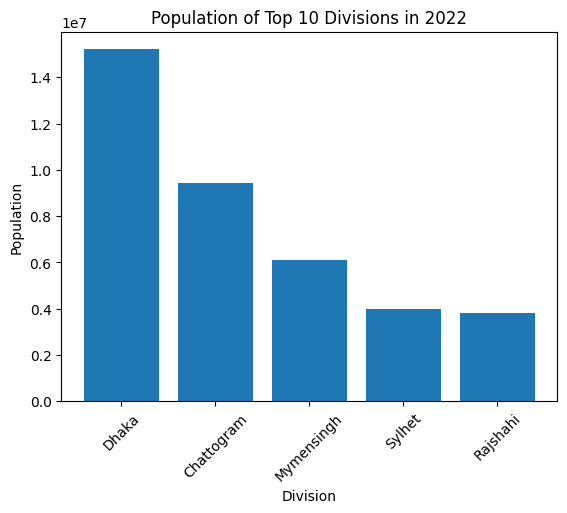

In [19]:
# Plotting the population of top 10 divisions in 2022
top_10_divisions = data.nlargest(10, 'Population_2022')
plt.bar(top_10_divisions['Division'], top_10_divisions['Population_2022'])
plt.title('Population of Top 10 Divisions in 2022')
plt.xlabel('Division')
plt.ylabel('Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

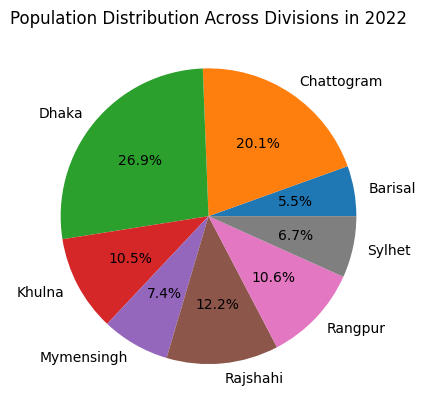

In [20]:
# Plotting the population distribution across divisions in 2022 using a pie chart
division_population_sum = data.groupby('Division')['Population_2022'].sum()
plt.pie(division_population_sum, labels=division_population_sum.index, autopct='%1.1f%%')
plt.title('Population Distribution Across Divisions in 2022')
plt.show()

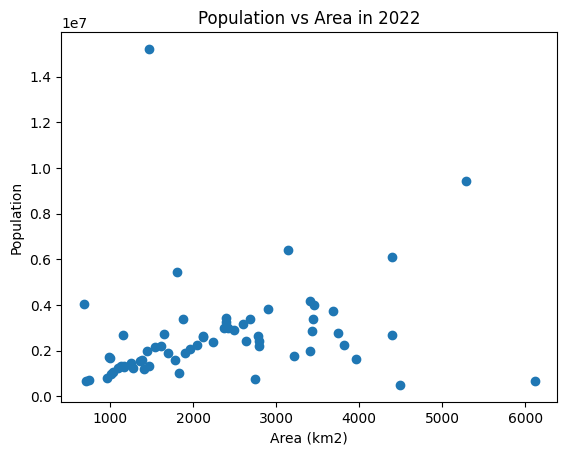

In [21]:
# Plotting a scatter plot to explore the relationship between area and population in 2022
plt.scatter(data['Area (km2)'], data['Population_2022'])
plt.title('Population vs Area in 2022')
plt.xlabel('Area (km2)')
plt.ylabel('Population')
plt.show()

In [22]:
feature_columns = ['Area (km2)', 'Population_1991', 'Population_2001', 'Population_2011']

# Target column
target_column = 'Population_2022'

# Extract features and target variable
X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Round the predictions to the nearest integer
rounded_predictions = [round(pred) for pred in predictions]

# Calculate R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f'R-squared: {r_squared}')



new_data_scaled = scaler.transform(df[feature_columns])
# Ensure 'new_data_scaled' is a DataFrame with the same structure as 'X_train_scaled'

# Make predictions for the new data
predicted_population_2022 = model.predict(new_data_scaled)

# Round the predicted population to the nearest integer
rounded_predicted_population_2022 = [round(pred) for pred in predicted_population_2022]
print(f'Predicted Population_2022: {rounded_predicted_population_2022}')




R-squared: 0.9901357318062253
Predicted Population_2022: [1002772, 2446365, 1949911, 727174, 1703289, 1199554, 540165, 3416908, 2689724, 8740842, 2879752, 6407329, 1707856, 734221, 2054015, 3779318, 768467, 15245649, 2152388, 4838627, 1252806, 3366917, 1261548, 1580208, 1674081, 3778996, 2642057, 1201167, 1288482, 4108592, 2590759, 5948326, 2574109, 1509610, 1525842, 1292139, 3171067, 2044943, 2346583, 2235141, 1061583, 750978, 800122, 2211339, 3956202, 1933020, 1038604, 2954575, 1992153, 2991252, 2980015, 3612926, 3468835, 2747687, 2455539, 1460922, 2175267, 1188211, 3334835, 1625240, 2521216, 2316822, 3031971, 4431470]


In [36]:
# Create and train the Random Forest model
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_rf = model_random_forest.predict(X_test_scaled)

# Round the predictions to the nearest integer
rounded_predictions_rf = [round(pred) for pred in predictions_rf]

# Calculate R-squared for Random Forest
r_squared_rf = r2_score(y_test, rounded_predictions_rf)
print(f'R-squared (Random Forest): {r_squared_rf}')

new_data_scaled_rf = scaler.transform(df[feature_columns])
predicted_population_2022_rf = model_random_forest.predict(new_data_scaled_rf)
rounded_predicted_population_2022_rf = [round(pred) for pred in predicted_population_2022_rf]
print(f'Predicted Population_2022 (Random Forest): {rounded_predicted_population_2022_rf}')

R-squared (Random Forest): 0.977379472299695
Predicted Population_2022 (Random Forest): [1069555, 2744014, 2050522, 723328, 1750772, 1334517, 572924, 3351496, 2719114, 10241554, 2708695, 6117907, 1584269, 723318, 1959779, 3639728, 714165, 12017804, 2229423, 4591900, 1351458, 3433123, 1338065, 1601932, 1645912, 3496033, 2586867, 1227199, 1340129, 4223573, 2664329, 5799381, 2512274, 1569247, 1728583, 1259319, 3242259, 2023377, 2694032, 2194885, 1057139, 724336, 778817, 2312355, 4405178, 1879188, 1057688, 2898915, 1931001, 2921342, 2944109, 3539915, 3517962, 2663248, 2397291, 1410495, 2010809, 1160132, 3453964, 1529558, 2390556, 2071245, 2776851, 4186754]


In [40]:
# Create and train the Gradient Boosting Regressor model
model_gradient_boosting = GradientBoostingRegressor(random_state=42)
model_gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_gb = model_gradient_boosting.predict(X_test_scaled)

# Round the predictions to the nearest integer
rounded_predictions_gb = [round(pred) for pred in predictions_gb]

# Calculate R-squared for Gradient Boosting
r_squared_gb = r2_score(y_test, rounded_predictions_gb)
print(f'R-squared (Gradient Boosting): {r_squared_gb}')

new_data_scaled_gb = scaler.transform(df[feature_columns])
predicted_population_2022_gb = model_gradient_boosting.predict(new_data_scaled_gb)
rounded_predicted_population_2022_gb = [round(pred) for pred in predicted_population_2022_gb]
print(f'Predicted Population_2022 (Gradient Boosting): {rounded_predicted_population_2022_gb}')

R-squared (Gradient Boosting): 0.8185486084765892
Predicted Population_2022 (Gradient Boosting): [984690, 2632906, 1986888, 684207, 1759576, 1303865, 500472, 3398092, 2721893, 12730708, 2890965, 6388326, 1648849, 731422, 2002526, 3715031, 653749, 15208164, 2229531, 5432488, 1336769, 3380910, 1336244, 1608207, 1668982, 3891042, 2662412, 1228730, 1336244, 4170805, 2604215, 6101804, 2417351, 1553421, 1658185, 1263822, 3388031, 2035917, 2661834, 2201051, 977831, 721979, 809144, 2248153, 4398212, 1881280, 977831, 2851642, 1899306, 2963907, 2969849, 3432615, 3292195, 2626931, 2376613, 1460454, 2042098, 1210110, 3387221, 1569747, 2439065, 2053203, 2787148, 4000223]


In [42]:


# Create and train the Lasso Regression model
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_lasso = model_lasso.predict(X_test_scaled)

# Round the predictions to the nearest integer
rounded_predictions_lasso = [round(pred) for pred in predictions_lasso]

# Calculate R-squared for Lasso Regression
r_squared_lasso = r2_score(y_test, rounded_predictions_lasso)
print(f'R-squared (Lasso Regression): {r_squared_lasso}')


# Lasso Regression
new_data_scaled_lasso = scaler.transform(df[feature_columns])
predicted_population_2022_lasso = model_lasso.predict(new_data_scaled_lasso)
rounded_predicted_population_2022_lasso = [round(pred) for pred in predicted_population_2022_lasso]
print(f'Predicted Population_2022 (Lasso Regression): {rounded_predicted_population_2022_lasso}')


R-squared (Lasso Regression): 0.990186549731721
Predicted Population_2022 (Lasso Regression): [1003046, 2446936, 1951205, 727332, 1704274, 1199598, 540550, 3415013, 2689741, 8743626, 2879095, 6404678, 1707356, 735584, 2053370, 3777969, 769186, 15249132, 2153318, 4833165, 1253482, 3366661, 1261827, 1580170, 1673690, 3777471, 2641601, 1201470, 1289027, 4107952, 2591052, 5947595, 2574446, 1510115, 1527008, 1293102, 3171783, 2045290, 2350014, 2235506, 1061800, 751522, 800236, 2212662, 3955413, 1933557, 1038690, 2954438, 1991543, 2990408, 2981163, 3613269, 3469124, 2746857, 2454721, 1461117, 2175061, 1188247, 3335140, 1625725, 2520458, 2316418, 3031110, 4428290]


In [43]:
# Create and train the Ridge Regression model
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_ridge = model_ridge.predict(X_test_scaled)

# Round the predictions to the nearest integer
rounded_predictions_ridge = [round(pred) for pred in predictions_ridge]

# Calculate R-squared for Ridge Regression
r_squared_ridge = r2_score(y_test, rounded_predictions_ridge)
print(f'R-squared (Ridge Regression): {r_squared_ridge}')

# Ridge Regression
new_data_scaled_ridge = scaler.transform(df[feature_columns])
predicted_population_2022_ridge = model_ridge.predict(new_data_scaled_ridge)
rounded_predicted_population_2022_ridge = [round(pred) for pred in predicted_population_2022_ridge]
print(f'Predicted Population_2022 (Ridge Regression): {rounded_predicted_population_2022_ridge}')

R-squared (Ridge Regression): 0.9925324461822229
Predicted Population_2022 (Ridge Regression): [981153, 2745878, 2031940, 776750, 1731601, 1286432, 204038, 3370888, 2905261, 9280672, 2665911, 6485141, 1691159, 601424, 2028262, 3619738, 387599, 14952874, 2264150, 3973329, 1363063, 3459891, 1365035, 1625417, 1702913, 3570258, 2670083, 1216178, 1351860, 4288434, 2727161, 6116231, 2606988, 1596918, 1628981, 1325267, 3300374, 2077665, 2713526, 2315854, 1051811, 743309, 809300, 2271763, 4053674, 1937885, 1046745, 3032227, 1979815, 2972521, 3104337, 3715652, 3527619, 2806797, 2408763, 1462819, 2163386, 1112180, 3446067, 1608161, 2410723, 2196069, 2820776, 3982963]


In [44]:
# Create and train the XGBoost model
model_xgboost = xgb.XGBRegressor(random_state=42)
model_xgboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_xgboost = model_xgboost.predict(X_test_scaled)

# Round the predictions to the nearest integer
rounded_predictions_xgboost = [round(pred) for pred in predictions_xgboost]

# Calculate R-squared for XGBoost
r_squared_xgboost = r2_score(y_test, rounded_predictions_xgboost)
print(f'R-squared (XGBoost): {r_squared_xgboost}')

# XGBoost
new_data_scaled_xgboost = scaler.transform(df[feature_columns])
predicted_population_2022_xgboost = model_xgboost.predict(new_data_scaled_xgboost)
rounded_predicted_population_2022_xgboost = [round(pred) for pred in predicted_population_2022_xgboost]
print(f'Predicted Population_2022 (XGBoost): {rounded_predicted_population_2022_xgboost}')

R-squared (XGBoost): 0.8111421942976018
Predicted Population_2022 (XGBoost): [979979, 2634184, 1980479, 677573, 1770097, 1344857, 495256, 3403789, 2713244, 6097702, 2906280, 6394875, 1595798, 735113, 1994958, 3732034, 495256, 15210839, 2232771, 5433536, 1336913, 3373244, 1334807, 1608343, 1677953, 3352034, 2667966, 1228274, 1336394, 4168082, 2584020, 6097810, 2403210, 1552501, 1649874, 1262233, 2981024, 2051582, 2673004, 2198731, 975308, 721440, 806667, 2246671, 3797455, 1875273, 977123, 2844915, 1900218, 2972664, 2978136, 3430441, 3308157, 2621749, 2383267, 1461563, 2002222, 1207248, 3395536, 1569536, 2440145, 2046033, 2788359, 3990017]
